In [1]:
# load in the usual Python tools:
import os
import glob
import pickle
import re

# Our numerical workhorses
import numpy as np
import pandas as pd

# Import the project utils
import sys
sys.path.insert(0, '../code/')
import NB_sortseq_utils as utils
import anylogo

# Import matplotlib stuff for plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Seaborn, useful for graphics
import seaborn as sns

sns.set_palette("deep", color_codes=True)
utils.set_plotting_style1()
%matplotlib inline

We first need to load in all the processed Sort-Seq summary files:

In [2]:
datadir = '../code/sortseq/*/'
files = glob.glob(datadir+'*_mean.csv')

df = pd.DataFrame()

for f in enumerate(files):
    df_temp = pd.DataFrame()
    df_temp = pd.read_csv(f[1])
    # append data to df
    df = df.append(df_temp)

We can then take a look at what energy matrices are available to plot:

In [3]:
grouped_df = df[['promoter','strain','media','condition', 'TF', 'date']].copy()
grouped_df = grouped_df.groupby(['promoter','strain','media', 'condition','TF','date'])

print('(promoter, strain, growth media, TF, date)')
print('------------------------------------')
for key, item in grouped_df:
    print(key)

(promoter, strain, growth media, TF, date)
------------------------------------
('dgoR', 'JK10', 'EZrichgalactonate', '500cAMP', 'RNAP', 20160921)
('dgoR', 'JK10', 'EZrichglucose', '0cAMP', 'RNAP', 20160921)
('dgoR', 'MG1655', 'M9galactonate', 'na', 'RNAP_CRP', 20160707)
('dgoR', 'MG1655', 'M9glucose', 'na', 'RNAP', 20160707)
('dgoR', 'MG1655', 'M9glucose', 'na', 'RNAP_CRP', 20160707)
('dgoR', 'MG1655deltadgoR', 'M9glucose', 'na', 'RNAP', 20160824)
('dgoR', 'MG1655deltadgoR', 'M9glucose', 'na', 'RNAP_CRP', 20160824)
('lacZ', 'MG1655', 'M9glucose', 'na', 'CRP', 2011)
('lacZ', 'MG1655', 'M9glucose', 'na', 'LacI_O1', 2011)
('lacZ', 'MG1655', 'M9glucose', 'na', 'LacI_O3', 2011)
('lacZ', 'MG1655', 'M9glucose', 'na', 'RNAP', 2011)
('marR', 'MG1655', 'LB', 'na', 'Fis', 20150820)
('marR', 'MG1655', 'LB', 'na', 'MarA', 20150820)
('marR', 'MG1655', 'LB', 'na', 'MarR_left', 20150513)
('marR', 'MG1655', 'LB', 'na', 'MarR_right', 20150513)
('marR', 'MG1655', 'LB', 'na', 'RNAP', 20150513)
('marR', '

As an example, lets say we want to plot our RNAP energy matrix and logo from the _lacZ_ promoter data, with cells grown in M9 minimal media with 0.5% glucose (strain MG1655). We will create a new pandas dataframe to hold only this data. CHange the choice of promoter, strain, media, and TF to a different row listed above.

In [4]:
df_forplotting = df[(df.promoter == 'purT') & 
        (df.strain == 'MG1655') & 
        (df.media == 'M9glucose') &
        (df.TF == 'PurR') &
        (df.date == 20160710) &
        (df.condition == 'adenine')].copy()


We can now plot the energy matrix and sequence logo:

-0.362589438676
0.362589438676


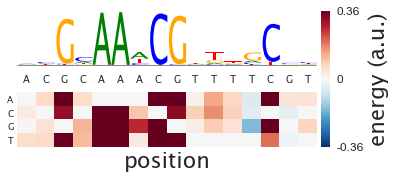

In [5]:
# Plot logo on top of matrix
fig = plt.figure(figsize=(0.35*len(df_forplotting),2.5))
ax = fig.add_subplot(111)
utils.logo_on_matrix(ax,df_forplotting,relative_scale=1,relative_spacing=.5)
# fig.savefig('relB_RNAP.pdf')

Lets also save the gauge-fixed matrix:

In [6]:
# df_forplotting[['A','C','G','T']].to_csv('purT_emat_df.csv')